Charger l'image.

(1200, 819, 3)


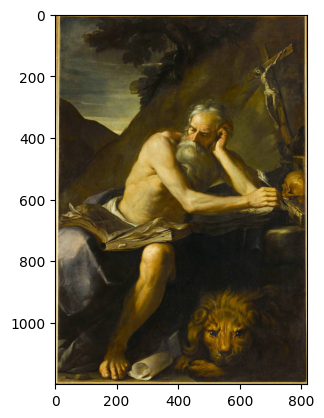

In [374]:
import skimage as ski
import matplotlib.pyplot as plt

image_path = "data/st jerome.jpg"

image = ski.io.imread(image_path)

plt.imshow(image)
print(image.shape)

In [375]:
# test_image = ski.color.rgb2gray(image) > ski.filters.threshold_otsu(ski.color.rgb2gray(image))
# plt.imshow(test_image, cmap="gray")

In [376]:
# image = ski.color.rgb2gray(image)
# plt.imshow(image, cmap="gray")

In [377]:
# image = ski.exposure.equalize_adapthist(image)
# plt.imshow(image, cmap="gray")

In [378]:
# for _ in range(5):
#     image = ski.restoration.denoise_bilateral(image, sigma_color=0.1, sigma_spatial=2)
# plt.imshow(image, cmap="gray")

Trouver les bords de l'image.

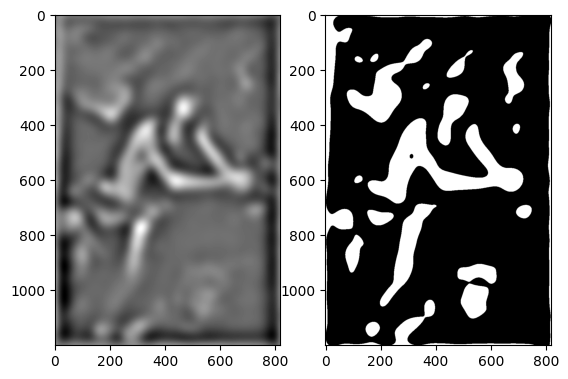

In [379]:
from fdog import difference_of_gaussians
import numpy as np

fig, axs = plt.subplots(1, 2)

low_sigma=20

background_dog_image = ski.color.rgb2gray(difference_of_gaussians(image, low_sigma, high_sigma=1.7*low_sigma))
axs[0].imshow(background_dog_image, cmap="gray")
background_thresh_image = background_dog_image > 0.008
axs[1].imshow(background_thresh_image, cmap="gray")

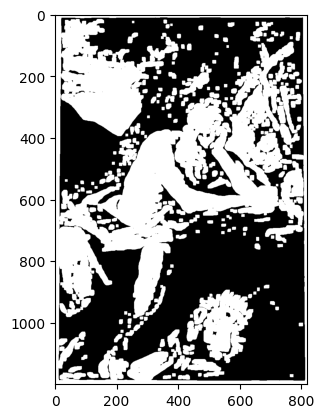

In [380]:
dilated_background_image = ski.morphology.dilation(thresh_image, footprint=np.ones((8,8)))
plt.imshow(dilated_background_image, cmap="gray")

In [381]:
print(image.shape)

(1200, 819, 3)


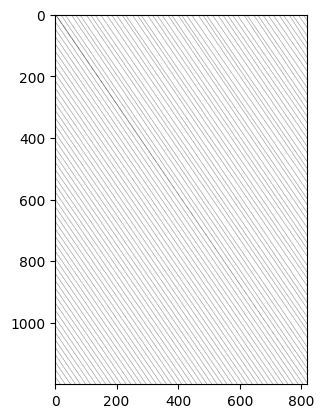

In [408]:
import numpy as np
import random

texture1 = np.ones(dilated_background_image.shape)
nb_lines = 50
for i in range(nb_lines):
    r0 = 0
    r1 = min(image.shape[0] - 1 - i*image.shape[0]//nb_lines + random.choice(list(range(-3,4))), image.shape[0] - 1)
    c0 = i*image.shape[1]//nb_lines
    c1 = image.shape[1] - 1
    rr, cc = ski.draw.line(r0, c0, r1, c1)
    texture1[rr, cc] = 0

    r0 = i*image.shape[0]//nb_lines
    c0 = 0
    r1 = image.shape[0] - 1
    c1 = image.shape[1] - 1 - i*image.shape[1]//nb_lines
    rr, cc = ski.draw.line(r0, c0, r1, c1)
    texture1[rr, cc] = 0

plt.imshow(texture1, cmap="gray")

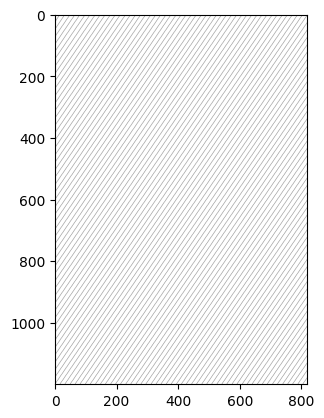

In [383]:
texture2 = np.ones(dilated_background_image.shape)
nb_lines = 50
for i in range(nb_lines):
    r0 = i*image.shape[0]//nb_lines
    r1 = 0
    c0 = 0
    c1 = i*image.shape[1]//nb_lines
    rr, cc = ski.draw.line(r0, c0, r1, c1)
    texture2[rr, cc] = 0

    r0 = image.shape[0] - 1
    c0 = i*image.shape[1]//nb_lines
    r1 = i*image.shape[0]//nb_lines
    c1 = image.shape[1] - 1
    rr, cc = ski.draw.line(r0, c0, r1, c1)
    texture2[rr, cc] = 0

plt.imshow(texture2, cmap="gray")

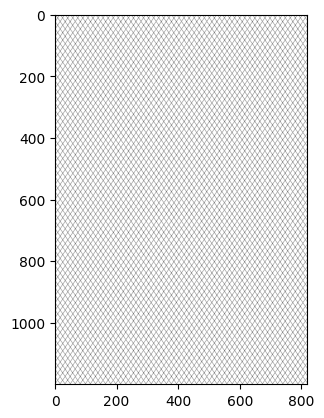

In [384]:
plt.imshow(texture1*texture2, cmap="gray")

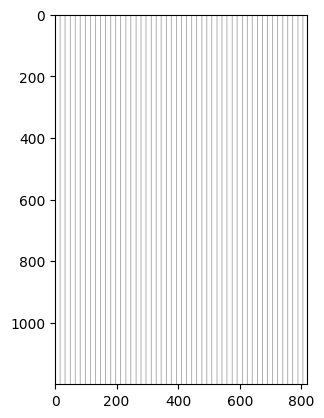

In [385]:
texture3 = np.ones(dilated_background_image.shape)
nb_lines = 50
for i in range(nb_lines):
    r0 = 0
    r1 = image.shape[0] - 1
    c0 = i*image.shape[1]//nb_lines
    c1 = i*image.shape[1]//nb_lines
    rr, cc = ski.draw.line(r0, c0, r1, c1)
    texture3[rr, cc] = 0

plt.imshow(texture3, cmap="gray")

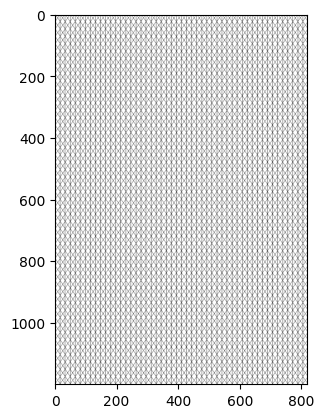

In [386]:
plt.imshow(texture3*texture2*texture1, cmap="gray")

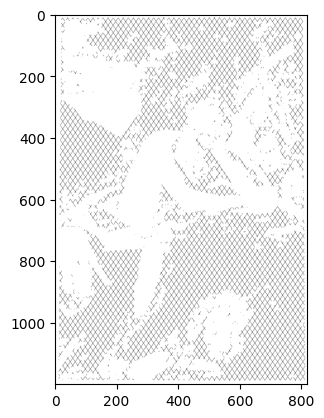

In [387]:
shadow_hatched = 1 - (1 -texture1*texture2)*(1-dilated_background_image)

plt.imshow(shadow_hatched, cmap="gray")

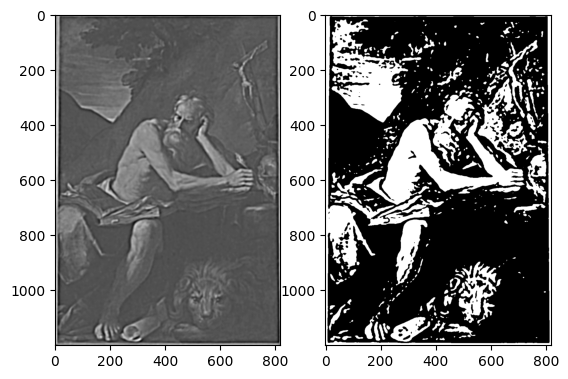

In [388]:
fig, axs = plt.subplots(1, 2)

low_sigma=3

dog_image = ski.color.rgb2gray(difference_of_gaussians(image, low_sigma, high_sigma=1.7*low_sigma, p=10))
axs[0].imshow(dog_image, cmap="gray")
thresh_image = dog_image > ski.filters.threshold_mean(dog_image)
axs[1].imshow(thresh_image, cmap="gray")

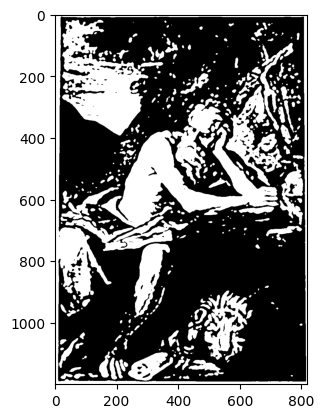

In [389]:
dilated_image = ski.morphology.dilation(thresh_image)
plt.imshow(dilated_image, cmap="gray")

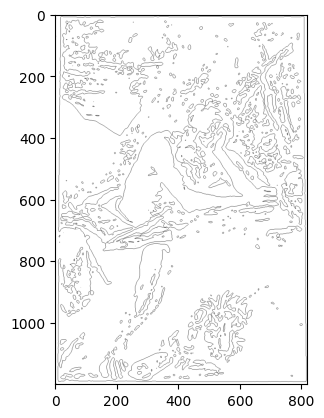

In [390]:
abs_diff = 1 - thresh_image ^ dilated_image
plt.imshow(abs_diff, cmap="gray")

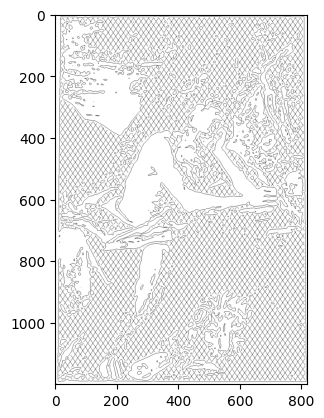

In [391]:
plt.imshow(abs_diff*shadow_hatched, cmap="gray")

In [392]:
# abs_diff *= 255
# abs_diff = abs_diff.astype(np.int8)

In [393]:
# from subprocess import run

# edge_image_path = image_path + "_edges.png"
# thinned_edge_image_path = image_path + "_thinned.png"

# ski.io.imsave(edge_image_path, abs_diff)
# run(["./skeletonize_linux", "-i", edge_image_path, "-o", thinned_edge_image_path])

Regrouper les bords de l'image en composantes connexes.

In [394]:
# from edge_walker import group_edges
# from utils import sort_edges


# edge_image = ski.io.imread(thinned_edge_image_path)
# plt.imshow(edge_image, cmap="gray")

In [395]:
edge_groups = sort_edges(group_edges(edge_image, min_edge_length=10, step=5))

50675
46352
46312
44133
44101
44098
44084
44081
44078
44074
44071
44067
44064
44060
44057
44054
44050
44047
44043
44039
44036
44032
44029
44008
44004
44001
43997
43994
43990
43987
43986
43982
43979
43975
43972
43968
43965
43964
43950
43946
43943
43939
43936
43932
43929
43925
43922
43918
43915
43911
43908
43907
43903
43900
43896
43893
43889
43886
43885
43881
43878
43877
43876
43875
43874
43871
41527
39193
39183
39101
39100
39099
39050
39046
39042
39039
39038
39030
39026
39025
39014
38994
38987
38986
38985
38984
38983
38982
38934
38930
38929
38928
38927
38926
37995
37068
36146
36117
36110
36107
35590
35588
35573
35469
35468
35467
35438
35437
35436
35435
35434
35433
35432
35426
35425
35412
35411
35410
35398
35397
35378
35377
35371
35367
35366
35365
35364
35363
35362
35359
35358
35357
35356
35355
35354
35277
35276
35275
35211
35210
35209
35180
35179
35175
35174
35173
35172
35171
35170
35169
35166
35155
35154
35153
35152
35151
35150
35149
35148
34862
34861
34579
34301
34300
34285
34284
3416

In [396]:
print(len(edge_groups))

328


<Axes: ylabel='Count'>

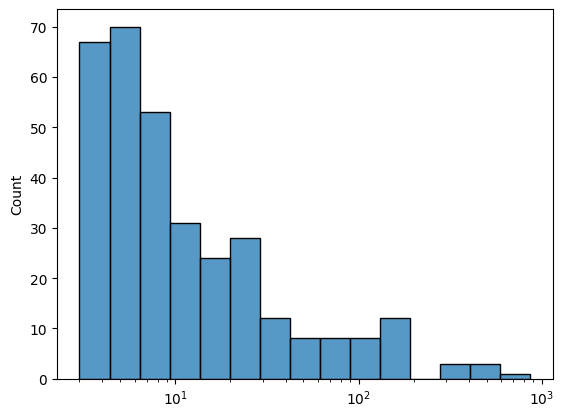

In [397]:
edge_group_lens = []
for g in edge_groups:
    edge_group_lens.append(len(g))

import seaborn as sns

sns.histplot(edge_group_lens, log_scale=True)
#hist = plt.hist(edge_group_lens)

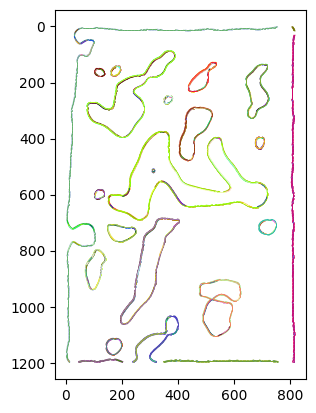

In [398]:
import matplotlib.colors as mcolors
cs = list(mcolors.XKCD_COLORS.values())*1000


plt.gca().invert_yaxis()
for c, point_group in zip(cs, edge_groups):
    preceding_point = point_group[0]
    for p in point_group:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c=c, linewidth=0.5)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")

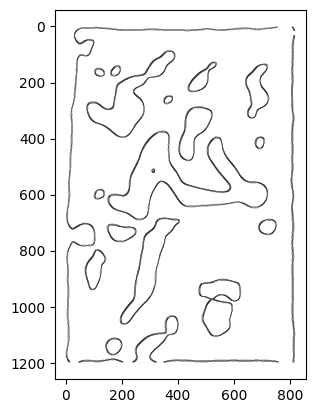

In [399]:
plt.gca().invert_yaxis()
ids=0
for point_group in edge_groups:
    ids+=1
    preceding_point = point_group[0]
    for p in point_group:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c="black", linewidth=0.2)
        preceding_point = p.copy()


plt.gca().set_aspect("equal")

In [400]:
import pickle

with open(image_path+"_edges.pkl", "wb") as f:
    pickle.dump(edge_groups, f)
    f.close()